In [3]:
library(tidyverse)
library(ggplot2)
library(stringr)

library(rvest)
library(purrr)
library(polite)

-- Attaching packages --------------------------------------- tidyverse 1.3.1 --

v ggplot2 3.3.5     v purrr   0.3.4
v tibble  3.1.3     v dplyr   1.0.7
v tidyr   1.1.3     v stringr 1.4.0
v readr   2.0.0     v forcats 0.5.1

-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()

Warning message:
"package 'rvest' was built under R version 4.1.1"

Attaching package: 'rvest'


The following object is masked from 'package:readr':

    guess_encoding




In [4]:
covid_case <- read.csv("https://raw.githubusercontent.com/andyholmes1210/DATA201-Project/main/WHO-COVID-19-global-data.csv")
covid_case

ï..Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>
2020-01-03,AF,Afghanistan,EMRO,0,0,0,0
2020-01-04,AF,Afghanistan,EMRO,0,0,0,0
2020-01-05,AF,Afghanistan,EMRO,0,0,0,0
2020-01-06,AF,Afghanistan,EMRO,0,0,0,0
2020-01-07,AF,Afghanistan,EMRO,0,0,0,0
2020-01-08,AF,Afghanistan,EMRO,0,0,0,0
2020-01-09,AF,Afghanistan,EMRO,0,0,0,0
2020-01-10,AF,Afghanistan,EMRO,0,0,0,0
2020-01-11,AF,Afghanistan,EMRO,0,0,0,0


In [5]:
covid_case_new_zealand <- covid_case %>%
    filter(Country == "New Zealand")

covid_case_new_zealand <- select(covid_case_new_zealand, -Country_code, -WHO_region, -New_deaths, -Cumulative_deaths)

covid_case_new_zealand

ï..Date_reported,Country,New_cases,Cumulative_cases
<chr>,<chr>,<int>,<int>
2020-01-03,New Zealand,0,0
2020-01-04,New Zealand,0,0
2020-01-05,New Zealand,0,0
2020-01-06,New Zealand,0,0
2020-01-07,New Zealand,0,0
2020-01-08,New Zealand,0,0
2020-01-09,New Zealand,0,0
2020-01-10,New Zealand,0,0
2020-01-11,New Zealand,0,0


In [6]:
border_crossing <- read.csv("https://raw.githubusercontent.com/andyholmes1210/DATA201-Project/main/covid_19_data_portal_Border%20crossings.csv")
border_crossing

ï..class,category,indicator_name,series_name,sub_series_name,parameter,value,units,date_last_updated
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>
Economic,Travel,Daily border crossings (by port) - arrivals,Auckland,Auckland,2016-01-01,13322,Number,12-10-21
Economic,Travel,Daily border crossings (by port) - arrivals,Auckland,Auckland,2016-01-02,15351,Number,12-10-21
Economic,Travel,Daily border crossings (by port) - arrivals,Auckland,Auckland,2016-01-03,15892,Number,12-10-21
Economic,Travel,Daily border crossings (by port) - arrivals,Auckland,Auckland,2016-01-04,14771,Number,12-10-21
Economic,Travel,Daily border crossings (by port) - arrivals,Auckland,Auckland,2016-01-05,14791,Number,12-10-21
Economic,Travel,Daily border crossings (by port) - arrivals,Auckland,Auckland,2016-01-06,15360,Number,12-10-21
Economic,Travel,Daily border crossings (by port) - arrivals,Auckland,Auckland,2016-01-07,14629,Number,12-10-21
Economic,Travel,Daily border crossings (by port) - arrivals,Auckland,Auckland,2016-01-08,15423,Number,12-10-21
Economic,Travel,Daily border crossings (by port) - arrivals,Auckland,Auckland,2016-01-09,15521,Number,12-10-21


In [7]:
border_region <- select(border_crossing, -category, -indicator_name, -ï..class, -units, -date_last_updated, -sub_series_name)

border_region <- border_region %>% rename(
    City = series_name,
    Dates = parameter,
    Border_crossed = value)

border_region

City,Dates,Border_crossed
<chr>,<chr>,<int>
Auckland,2016-01-01,13322
Auckland,2016-01-02,15351
Auckland,2016-01-03,15892
Auckland,2016-01-04,14771
Auckland,2016-01-05,14791
Auckland,2016-01-06,15360
Auckland,2016-01-07,14629
Auckland,2016-01-08,15423
Auckland,2016-01-09,15521


In [8]:
border_auckland <- border_region %>%
    filter(City == "Auckland",
          Dates > "2020-01-01")
#border_auckland

border_auckland <- select(border_auckland, -City)
border_auckland[is.na(border_auckland)] <- 0

border_auckland

Dates,Border_crossed
<chr>,<int>
2020-01-02,17277
2020-01-03,19473
2020-01-04,18181
2020-01-05,19322
2020-01-06,17964
2020-01-07,17669
2020-01-08,18956
2020-01-09,17947
2020-01-10,18788


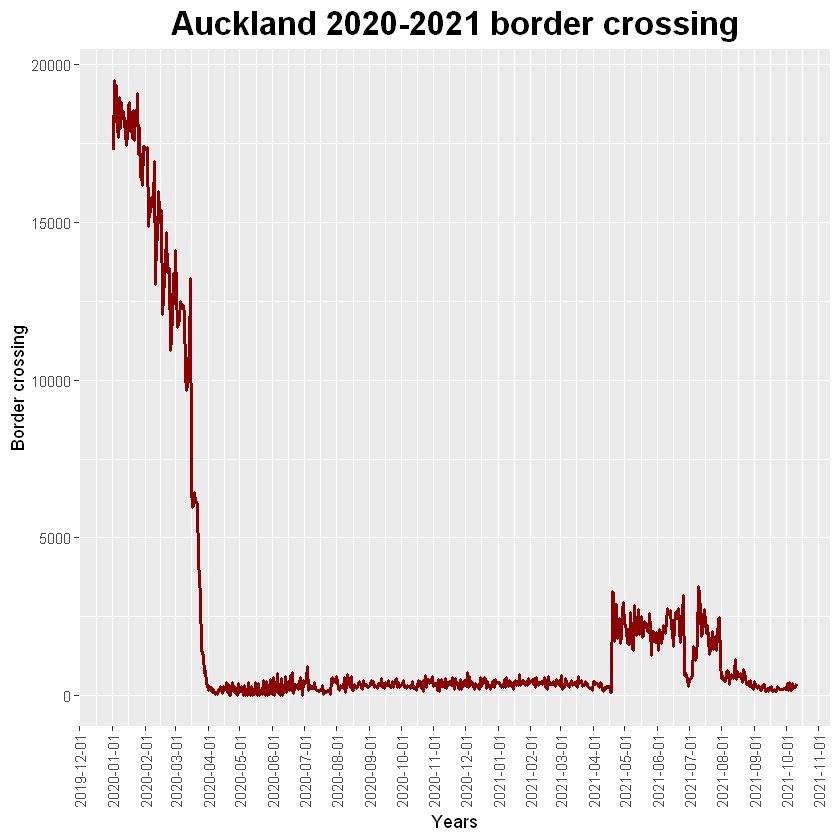

In [67]:
auckland_border_plot <- ggplot(border_auckland, aes(x=as.Date(Dates), y=Border_crossed, group=1)) + 
        geom_line(colour = "darkred", size = 1) +
        labs(x="Years", y="Border crossing") +
        scale_x_date(date_labels = "%Y-%m-%d", date_breaks = "1 month") +
        theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 1)) +
        ggtitle('Auckland 2020-2021 border crossing') +
        theme(plot.title = element_text(size=20, face="bold", hjust=0.5))
       
auckland_border_plot

In [30]:
border_christchurch <- border_region %>%
    filter(City == "Christchurch",
          Dates > "2020-01-01")
#border_auckland

border_christchurch <- select(border_christchurch, -City)
border_christchurch[is.na(border_christchurch)] <- 0

border_christchurch

Dates,Border_crossed
<chr>,<int>
2020-01-02,3289
2020-01-03,3294
2020-01-04,4389
2020-01-05,2397
2020-01-06,3491
2020-01-07,2823
2020-01-08,2735
2020-01-09,3227
2020-01-10,3304


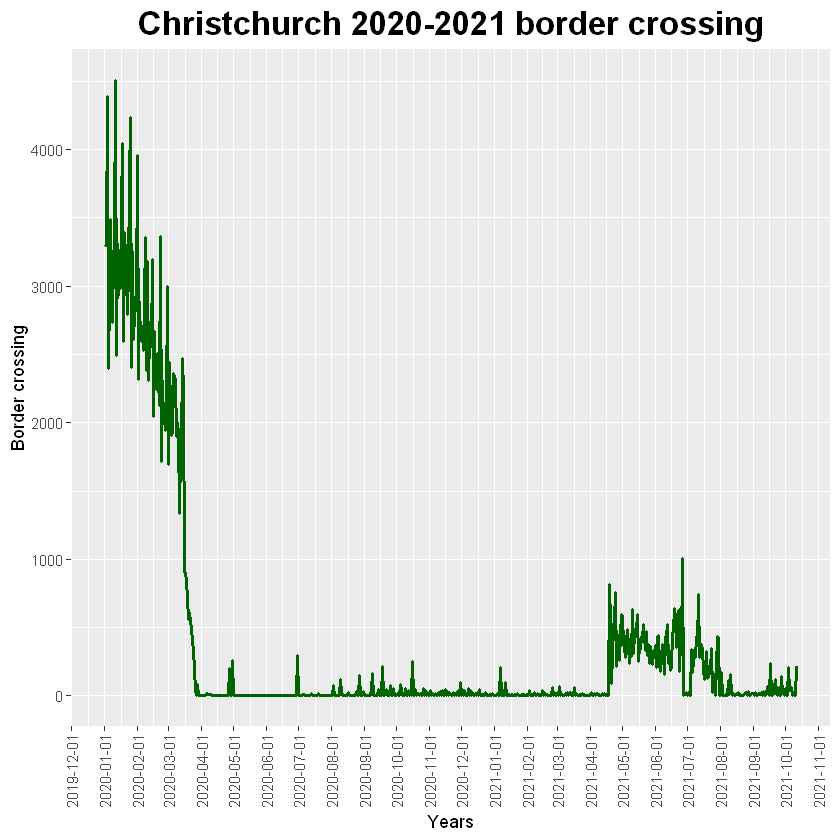

In [63]:
christchurch_border_plot <- ggplot(border_christchurch, aes(x=as.Date(Dates), y=Border_crossed, group=1)) + 
        geom_line(colour = "darkgreen", size = 1) +
        labs(x="Years", y="Border crossing") +
        scale_x_date(date_labels = "%Y-%m-%d", date_breaks = "1 month") +
        theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 1)) +
        ggtitle('Christchurch 2020-2021 border crossing') +
        theme(plot.title = element_text(size=20, face="bold", hjust=0.5))
       
christchurch_border_plot

In [32]:
border_queenstown <- border_region %>%
    filter(City == "Queenstown",
          Dates > "2020-01-01")
#border_auckland

border_queenstown <- select(border_queenstown, -City)
border_queenstown[is.na(border_queenstown)] <- 0

border_queenstown

Dates,Border_crossed
<chr>,<int>
2020-01-02,1369
2020-01-03,1495
2020-01-04,1558
2020-01-05,1419
2020-01-06,1339
2020-01-07,1255
2020-01-08,1401
2020-01-09,1263
2020-01-10,1283


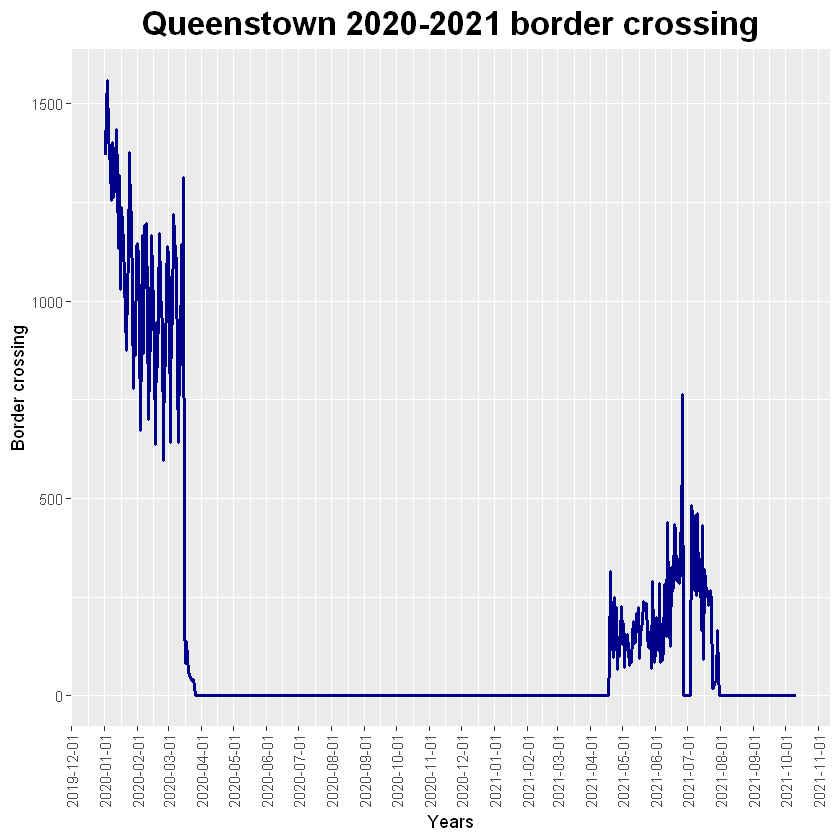

In [68]:
queenstown_border_plot <- ggplot(border_queenstown, aes(x=as.Date(Dates), y=Border_crossed, group=1)) + 
        geom_line(colour = "darkblue", size = 1) +
        labs(x="Years", y="Border crossing") +
        scale_x_date(date_labels = "%Y-%m-%d", date_breaks = "1 month") +
        theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 1)) +
        ggtitle('Queenstown 2020-2021 border crossing') +
        theme(plot.title = element_text(size=20, face="bold", hjust=0.5))
       

queenstown_border_plot

In [34]:
border_wellington <- border_region %>%
    filter(City == "Wellington",
          Dates > "2020-01-01")
#border_auckland

border_wellington <- select(border_wellington, -City)
border_wellington[is.na(border_wellington)] <- 0

border_wellington

Dates,Border_crossed
<chr>,<int>
2020-01-02,1481
2020-01-03,1452
2020-01-04,2007
2020-01-05,1924
2020-01-06,757
2020-01-07,2061
2020-01-08,1421
2020-01-09,1471
2020-01-10,1568


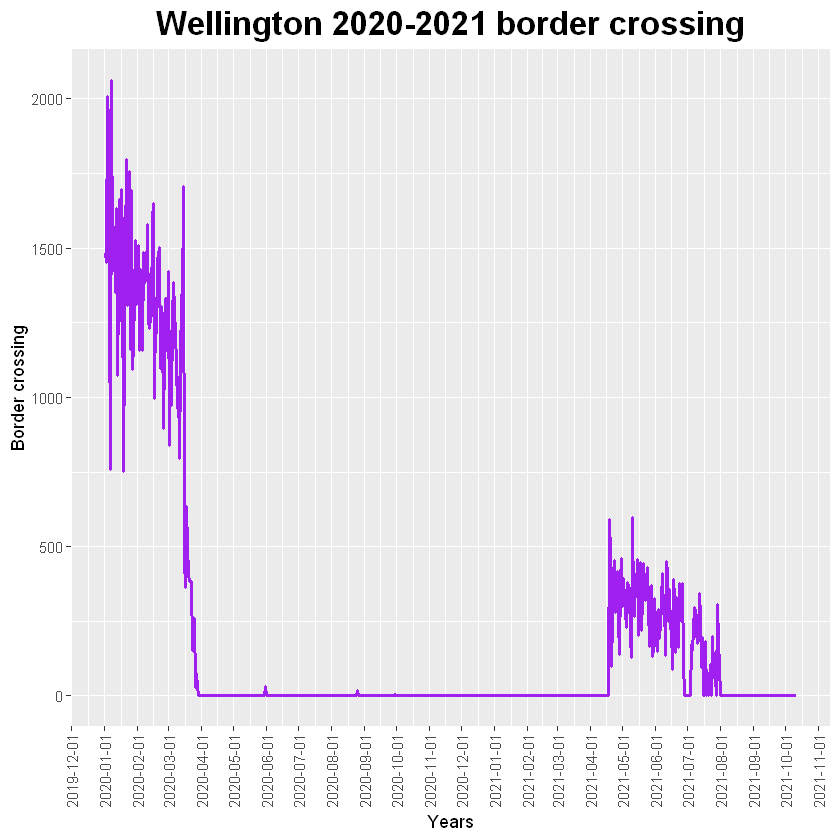

In [65]:
wellington_border_plot <- ggplot(border_wellington, aes(x=as.Date(Dates), y=Border_crossed, group=1)) + 
        geom_line(colour = "purple", size = 1) +
        labs(x="Years", y="Border crossing") +
        scale_x_date(date_labels = "%Y-%m-%d", date_breaks = "1 month") +
        theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 1)) +
        ggtitle('Wellington 2020-2021 border crossing') +
        theme(plot.title = element_text(size=20, face="bold", hjust=0.5))
      
wellington_border_plot

In [36]:
border_everything <- border_region %>%
    filter(City %in% c("Auckland", "Christchurch", "Queenstown", "Wellington"),
          Dates > "2020-01-01")
#border_auckland

border_everything[is.na(border_everything)] <- 0

border_everything

City,Dates,Border_crossed
<chr>,<chr>,<int>
Auckland,2020-01-02,17277
Auckland,2020-01-03,19473
Auckland,2020-01-04,18181
Auckland,2020-01-05,19322
Auckland,2020-01-06,17964
Auckland,2020-01-07,17669
Auckland,2020-01-08,18956
Auckland,2020-01-09,17947
Auckland,2020-01-10,18788


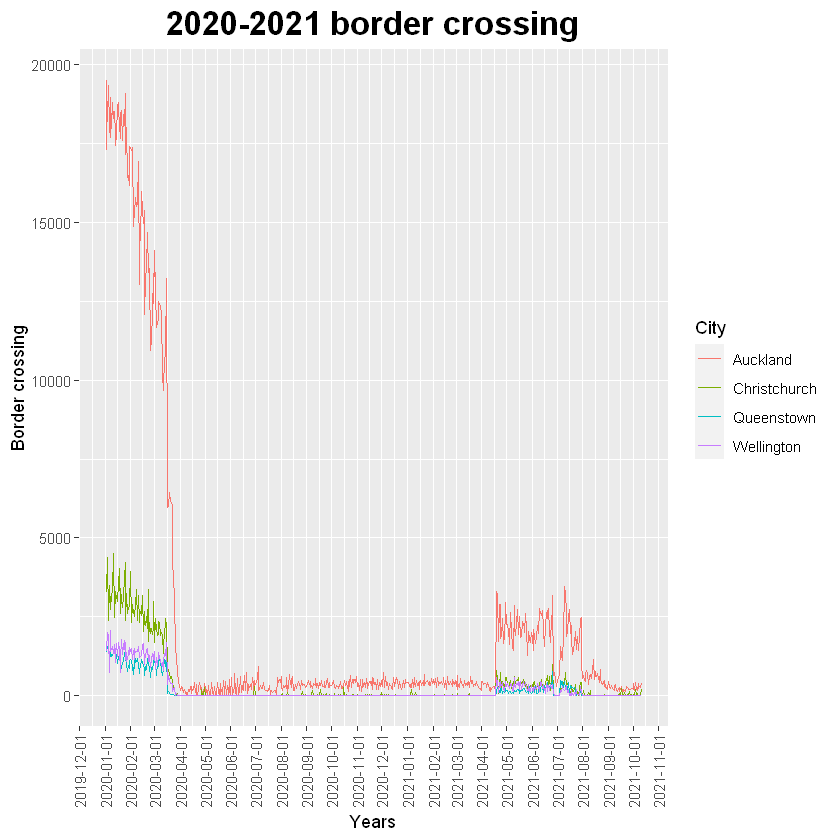

In [62]:
allcities_border_plot <- ggplot(border_everything, aes(x=as.Date(Dates), y=Border_crossed, group=City, color=City)) + 
        geom_line() +
        labs(x="Years", y="Border crossing") +
        scale_x_date(date_labels = "%Y-%m-%d", date_breaks = "1 month") +
        theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 1)) +
        ggtitle('2020-2021 border crossing') +
        theme(plot.title = element_text(size=20, face="bold", hjust=0.5))
     
allcities_border_plot

In [ ]:
ggsave(file="auckland_border.png", plot = auckland_border_plot)
ggsave(file="christchurch_border.png", plot = christchurch_border_plot)
ggsave(file="queenstown_border.png", plot = queenstown_border_plot)
ggsave(file="wellington_border.png", plot = wellington_border_plot)
ggsave(file="allcities_border.png", plot = allcities_border_plot)